# GTI771 - Apprentissage machine avancé
## Département de génie logiciel et des technologies de l’information



## Laboratoire 2 - Extraction de primitives
#### <font color=black> Version 2 - Janvier 2024 </font>

##### <font color=grey> Version 1 - Prof. Alessandro L. Koerich.
##### Version 2 - Chargé de lab. Arthur Josi

| NOMS                  | CODE PERMANENT                                   |
|-----------------------|--------------------------------------------------|
| Étudiant1             | Code1                                            |
| Étudiant2             | Code2                                            |
| Étudiant3             | Code3                                            |

## Introduction

Ce deuxième laboratoire porte sur la définition et l’extraction de primitives sur des visages. Vous aurez deux semaine pour compléter celui-ci.

De nouveau, le problème de classification qui vous est présenté est le problème [Facial Expression Recognition (FER)](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data), dont le but est de classer des visages dans sept (7) catégories. En vous basant sur les concepts vus en classe et sur acquises en laboratoire, vous devez définir des primitives que vous jugez pertinentes à extraire sur ces types d’images et effectuer l’extraction de celles-ci sur l’ensemble de données fournies avec cet énoncé.

L’évaluation de ce laboratoire sera basée sur:
- la qualité des algorithmes proposés et utilisés;
- les réponses aux questions dans cette notebook;
- l'organisation de votre code source (SVP, n'oubliez pas de mettre des commentaires dans le code source!)

# Modules et bibliotèques python

### Import de bibliotèques

###  <font color=blue> À faire: </font>
1. Ajouter les bibliothèques que vous avez utilisées pour compléter ce notebook dans une cellule avec une petite description.

In [3]:
import numpy as np  # package for scientific computing with Python.
import matplotlib.pyplot as plt # 2D plotting library

# Partie 1 - Ensemble de données

Point de départ: *fer2013-clean.csv* ou *fer2013-clean-pre.csv*

## 1a: Charger le fichier de données nettoyé et normalisé

###  <font color=blue> À faire: </font>
1. Reprenez votre ensemble de données nettoyé et repérez les trois partitions de données: apprentissage, validation et test.

In [2]:
# Load data - Au choix:

# ferData = np.loadtxt( 'fer2013-clean.csv', delimiter=',', dtype=str )
ferData = np.loadtxt( 'content/fer2013-clean-pre.csv', delimiter=',', dtype=str )

training_data = ferData[ferData[:, 2] == 'Training']
validation_data = ferData[ferData[:, 2] == 'PublicTest']
test_data = ferData[ferData[:, 2] == 'PrivateTest']

def transform_str_float(d):
    return np.array([np.fromstring(row, sep=' ', dtype=float) for row in d])

# Training set
Xtrain = transform_str_float(training_data[:, 1])
ytrain = np.array(training_data[:,0], dtype=np.float32)

# Validation set
Xval = transform_str_float(validation_data[:, 1])
yval = np.array(validation_data[:,0], dtype=np.float32)

# # Test set
Xtest = transform_str_float(test_data[:, 1])
ytest = np.array(test_data[:,0], dtype=np.float32)

print(Xtrain.shape, Xval.shape, Xtest.shape)

(28657, 2304) (3582, 2304) (3580, 2304)


In [3]:

Xtrain = Xtrain.reshape( Xtrain.shape[0], 1, 48, 48 ).astype('uint8')
Xtest  = Xtest.reshape( Xtest.shape[0], 1, 48, 48 ).astype('uint8')
Xval   = Xval.reshape( Xval.shape[0], 1, 48, 48 ).astype('uint8')

# Partie 2: Extraction de primitives

Vous devez faire une recherche bibliographique pour trouver quelles sont les primitives qui sont plus souvent utilisées pour la reconnaissance des expressions faciales, et pour mieux comprendre leur intérêt. Voici quelques sources et mots-clés pour guider votre recherche:

- http://www.inf.ufpr.br/lesoliveira/download/ESWA2013.pdf
- https://doi.org/10.1016/j.patrec.2015.06.007
- https://doi.org/10.1109/FG.2011.5771374
- https://www.hindawi.com/journals/ijbi/2015/267807/
- https://link.springer.com/article/10.1007/s00500-020-05550-y
- https://ieeexplore.ieee.org/document/9232510/
- https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9136619
- https://ietresearch.onlinelibrary.wiley.com/doi/10.1049/iet-ipr.2018.6647


**Mots-clés**: feature extraction, facial expression recognition, facial emotion recognition.

Bibliothèques Python pour les algorithmes d'extraction de primitives :
* [Scikit-image](https://scikit-image.org/docs/dev/)
* [OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html)
* [Scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html)
* [BiT](https://pypi.org/project/Bitdesc/)
* [E-BiT](https://github.com/stevetmat/BioInspiredFDesc)

Exemples d'algorithmes d'extraction de primitive :

* LBP, LPQ, Gabor filters, SIFT, SURF, HOG, GLCM, Haralick Moments, BiT, E-BiT, etc.

## 2a: Choix d'un algorithme d'extraction des primitives

###  <font color=blue> À faire: </font>
1. Choisir un algorithme d'extraction de primitives
  - #### <font color=red> Attention! Les équipes doivent utiliser des primitives différentes! Il n'y a pas de mauvais choix, seulement des approaches différentes, pas d'inquiétude. </font>
  - Chaque équipe doit poster/publier un message dans le <font color=red>"forum TP2"</font> avec son choix
  - Première arrivée première servie!<br><br>
2. Généralement, les algorithmes d'extraction de primitives ont plusieurs étapes. Vous devez étudier l'algorithme et la bibliothèque choisie pour bien comprendre l'algorithme, les primitives qu'il produit, et la manière dont vous devrez coder celui-ci. Aucune réponse n'est attendue pour cette question.
3. Nommer l'algorithme choisi et expliquer brièvement celui-ci, ses hyperparamètres, et le vecteur de sortie (dimension, type de variable).

#### Réponses

#### Explication :
Les filtres de Gabor sont utilisés pour analyser la texture et les caractéristiques spatiales des images. Un filtre de Gabor est composé d'une fonction sinus avec une fonction gausienne.

$G\left(x,y;\lambda,\theta,\psi,\sigma,\gamma \right) = exp\left(- {x'^2+\gamma^2y'^2 \over 2\sigma^2} \right) cos\left( 2π{x' \over \lambda } + \psi \right)$

où :
1. $x' = x \cos \theta + y \sin \theta$
2. $y' = - x \sin \theta + y \cos \theta$

#### Hyperparamètres :
Les principaux hyperparamètres des filtres de Gabor sont :

1. Lambda (𝜆) : La longueur d'onde de la sinusoïde, qui détermine la fréquence de la sinusoïde.
2. Theta (𝜃) : L'orientation de la normale au parallélogramme, qui définit l'orientation du filtre.
3. Psi (𝜓) : La phase de la fonction sinusoïdale.
4. Sigma (𝜎) : L'écart-type de la gaussienne, qui contrôle l'étendue du filtre.
5. Gamma (𝛾) : Le rapport d'aspect de la gaussienne, qui détermine l'élongation du filtre.

#### Vecteur de sortie : 
Le vecteur de sortie dépend des dimensions de l'image et le nombre de filtre appliqués. Dans notre cas où les images sont de tailles 48x48, le vecteur de sortie sera de 2304.Votre explication ici

## 2b: Extraction globale des primitives

###  <font color=blue> À faire: </font>
1. Extraire les primitives choisies des visages (ensembles d'apprentissage, validation et test). Un vecteur de primitives peut être, p. ex. 16 valeurs réelles représentant les sorties des filtres de Gabor, un ensemble de Haar-like features ou plusieurs valeurs réelles calculées par les descripteurs de Haralick (p. ex. contraste, homogénéité, etc.).
  - Chaque image de visage sera alors représentée par un vecteur $d-$dimensionnel.
  - Attention! Le résultat des algorithmes d'extraction de primitives doit être des vecteurs de primitives. Il y a des algorithmes qui nécessitent d'une étape supplémentaire comme calculer les histogrammes de primitives (p. ex. LBP, LPQ, SIFT, etc.)<br><br>

2. Sauvegarder les vecteurs de primitives obtenus sous la forme d'un fichier 'csv' (*fer2013-clean-lbp.csv* ou *fer2013-clean-pre-lbp.csv*). N'oubliez pas d'utiliser toujours la même structure que le fichier original *fer2013.csv*. Vous devez nommer vos fichiers de primitive en référence à la primitive utilisée, p. ex., *fer2013-clean-lbp.csv* pour LBP, *fer2013-clean-hog.csv* pour HOG, etc.

#### Code

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

def normalize(X) -> np.ndarray:
    return X / 255.0

def standardize(data: np.ndarray) -> np.ndarray:
    scaler = StandardScaler()
    data_standardized = scaler.fit_transform(data)
    return data_standardized, scaler

def min_max_scale(data: np.ndarray) -> np.ndarray:
    min_max_scaler = MinMaxScaler(feature_range=(0, 1))
    data_scaled = min_max_scaler.fit_transform(data)
    return data_scaled, min_max_scaler

def processData(Xtrain, Xtest, Xval, is4848:bool = True):
    # Normalize the data
   

    #print("Normalized Data:")
    #print(Xtrain[0], Xtest[0], Xval[0])

    # Flatten the images
    Xtrain_flattened = Xtrain.reshape((Xtrain.shape[0], -1))
    Xtest_flattened = Xtest.reshape((Xtest.shape[0], -1))
    Xval_flattened = Xval.reshape((Xval.shape[0], -1))

  # Standardize
    Xtrain_standardized, standardizer = standardize(Xtrain_flattened)
    Xtest_standardized = standardizer.transform(Xtest_flattened)
    Xval_standardized = standardizer.transform(Xval_flattened)


    # Min-Max Scale
    Xtrain_scaled, minMaxScaler = min_max_scale(Xtrain_standardized)
    Xtest_scaled = minMaxScaler.transform(Xtest_standardized)
    Xval_scaled = minMaxScaler.transform(Xval_standardized)

  

    # Reshape back to original image shape
    if is4848:
        Xtrain_processed = Xtrain_scaled.reshape( Xtrain.shape[0], 1, 48, 48 )
        Xtest_processed  = Xtest_scaled.reshape( Xtest.shape[0], 1, 48, 48 )
        Xval_processed   = Xval_scaled.reshape( Xval.shape[0], 1, 48, 48 )
    else:
        Xtrain_processed = Xtrain_scaled.reshape( Xtrain.shape[0], -1)
        Xtest_processed  = Xtest_scaled.reshape( Xtest.shape[0],-1 )
        Xval_processed   = Xval_scaled.reshape( Xval.shape[0],-1 )
    #print("Processed Data:")
    #print(Xtrain_processed[0], Xtest_processed[0], Xval_processed[0])

    return Xtrain_processed, Xtest_processed, Xval_processed

# Assuming Xtrain, Xtest, Xval are already defined and are numpy arrays of images
# Here is an example of how you might define these arrays:
# Xtrain, Xtest, Xval = np.random.rand(100, 64, 64), np.random.rand(20, 64, 64), np.random.rand(20, 64, 64)

Xtrain_processed, Xtest_processed, Xval_processed = processData(Xtrain, Xtest, Xval)




Tested Params: ksize=31, sigma=1, lambd=3, gamma=3, psi=1 => Accuracy: 26.30%
Tested Params: ksize=31, sigma=1, lambd=3, gamma=1.5, psi=-1 => Accuracy: 26.17%
Tested Params: ksize=31, sigma=1, lambd=4, gamma=1.5, psi=-1 => Accuracy: 26.93%
Tested Params: ksize=31, sigma=1, lambd=3, gamma=1.5, psi=1 => Accuracy: 26.43%
Tested Params: ksize=31, sigma=1, lambd=3, gamma=3, psi=-1 => Accuracy: 26.07%
Tested Params: ksize=31, sigma=1, lambd=3, gamma=3, psi=-2 => Accuracy: 26.53%
Tested Params: ksize=31, sigma=1, lambd=4, gamma=1.5, psi=1 => Accuracy: 26.77%
Tested Params: ksize=31, sigma=1, lambd=3, gamma=1.5, psi=-2 => Accuracy: 26.50%
Tested Params: ksize=31, sigma=1, lambd=4, gamma=1.5, psi=-2 => Accuracy: 26.77%
Tested Params: ksize=31, sigma=1, lambd=4, gamma=3, psi=-1 => Accuracy: 26.83%
Tested Params: ksize=31, sigma=1, lambd=5, gamma=1.5, psi=-2 => Accuracy: 26.37%
Tested Params: ksize=31, sigma=1, lambd=4, gamma=3, psi=-2 => Accuracy: 26.67%
Tested Params: ksize=31, sigma=1, lambd=5

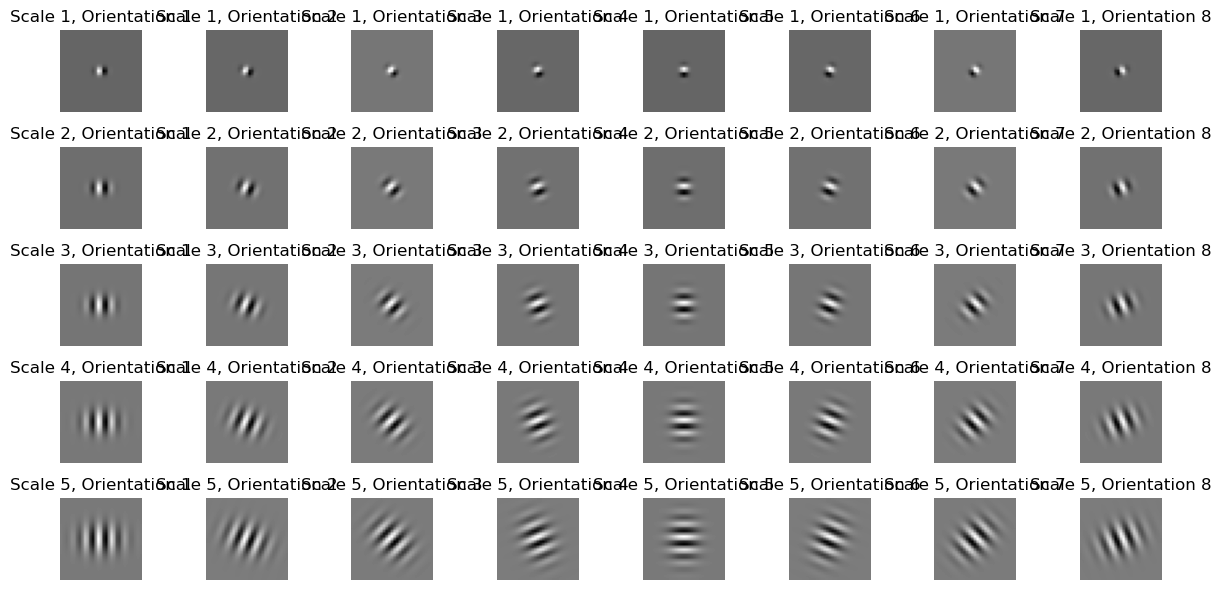

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler






def build_gabor_kernels(ksize=33, sigma=3.20, lambd=11.0, gamma=2.5, psi=-1, orientations=8, scales=5):
    kernels = []
    for scale in range(scales):
        for theta in np.linspace(0, np.pi, orientations, endpoint=False):
            kernel = cv2.getGaborKernel(
                (ksize, ksize), sigma +scale , theta, lambd, gamma, psi, ktype=cv2.CV_32F)
            kernels.append(kernel)
    return kernels

def apply_gabor_filters(image, kernels):
    filtered_images = []
    for kernel in kernels:
        filtered_image = cv2.filter2D(image, cv2.CV_8UC3, kernel)
        filtered_images.append(filtered_image)
    return filtered_images

def extract_features(filtered_images):
    features = []
    for img in filtered_images:
        mean = np.mean(img)
        variance = np.var(img)
        features.append(mean)
        features.append(variance)
        energy_val = np.sum(img**2)
        entropy_val = -np.sum(img * np.log(img + 1e-6))
        features.append(energy_val)
        features.append(entropy_val)
    return features

def load_data():
    # Placeholder function to load data
    # Replace this with actual data loading code
    #X = Xtrain # Dummy data
    X = Xtrain_processed[0:15000]
    y = ytrain[0:15000]  # Dummy labels (binary classification)
    return X, y

def evaluate_parameters(params, X, y, orientations, scales):
    ksize, sigma, lambd, gamma, psi = params
    kernels = build_gabor_kernels(ksize=ksize, sigma=sigma, lambd=lambd, gamma=gamma, psi=psi, orientations=orientations, scales=scales)

    X_features = []
    for i in range(len(X)):
        image = X[i].reshape(48, 48)
        filtered_images = apply_gabor_filters(image, kernels)
        features = extract_features(filtered_images)
        X_features.append(features)

    X_features = np.array(X_features)
    X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.20, random_state=42)
    pipe = make_pipeline(StandardScaler(), SVC())
    pipe.fit(X_train, y_train)
    pipe.score(X_test, y_test)
    clf = SVC()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Tested Params: ksize={ksize}, sigma={sigma}, lambd={lambd}, gamma={gamma}, psi={psi} => Accuracy: {accuracy * 100:.2f}%')

    return accuracy, params

def grid_search_gabor_params(X, y, ksize_values, sigma_values, lambd_values, gamma_values, psi_values, orientations=8, scales=5):
    best_accuracy = 0
    best_params = None

    param_sets = [(ksize, sigma, lambd, gamma, psi) 
                  for ksize in ksize_values 
                  for sigma in sigma_values 
                  for lambd in lambd_values 
                  for gamma in gamma_values 
                  for psi in psi_values]

    # Use joblib to evaluate the parameters in parallel
    results = Parallel(n_jobs=-1)(delayed(evaluate_parameters)(params, X, y, orientations, scales) for params in param_sets)
    
    print(f'Results: {results}')  # Debugging print
    
    # Find the best parameters based on the highest accuracy
    if results:
        best_accuracy, best_params = max(results, key=lambda x: x[0])
    
    print(f'Best Params: {best_params}, Best Accuracy: {best_accuracy}')  # Debugging print
    
    return best_params, best_accuracy


def visualize_kernels(kernels, orientations, scales):
    fig, axes = plt.subplots(scales, orientations, figsize=(12, 6))
    for i in range(scales):
        for j in range(orientations):
            kernel = kernels[i * orientations + j]
            ax = axes[i, j]
            ax.imshow(kernel, cmap='gray')
            ax.axis('off')
            ax.set_title(f'Scale {i+1}, Orientation {j+1}')
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    # Load the dataset
    X, y = load_data()

    # Define the ranges for the Gabor parameters (coarse search)
    ksize_values = [31]
    sigma_values = [1,1.5]
    lambd_values = [3,4,5]
    gamma_values = [1.5,3]
    psi_values = [-1, 1, -2]

    # Perform grid search
    best_params, best_accuracy = grid_search_gabor_params(X, y, ksize_values, sigma_values, lambd_values, gamma_values, psi_values, orientations=8, scales=5)

    print(f'Best Params: ksize={best_params[0]}, sigma={best_params[1]}, lambd={best_params[2]}, gamma={best_params[3]}, psi={best_params[4]}')
    print(f'Best Accuracy: {best_accuracy * 100:.2f}%')

    # Visualize an example image and its Gabor filtered responses with best parameters
    best_kernels = build_gabor_kernels(ksize=best_params[0], sigma=best_params[1], lambd=best_params[2], gamma=best_params[3], psi=best_params[4], orientations=8, scales=5)
    example_image = X[0].reshape(48, 48)
    filtered_images = apply_gabor_filters(example_image, best_kernels)
    gabor_processed_kernels = filtered_images

    visualize_kernels(best_kernels, orientations=8, scales=5)


In [17]:
def generate_global_features(X):
    global_features = []

    for i in range(len(X)):
        if i % 1000 == 0:
            print(f'Processing image {i}/{len(X)}')
        image = X[i].reshape(48, 48)
        filtered_images = apply_gabor_filters(image, best_kernels)
        features = extract_features(filtered_images)
        #global_features.append(X[i])  #On veut seulement avoir les valeurs des primitives global
        global_features.append(features)
    return np.array(global_features)



Xtrain_global_features = generate_global_features(Xtrain_processed)
Xtest_global_features = generate_global_features(Xtest_processed)
Xval_global_features = generate_global_features(Xval_processed)

Processing image 0/28657
Processing image 1000/28657
Processing image 2000/28657
Processing image 3000/28657
Processing image 4000/28657
Processing image 5000/28657
Processing image 6000/28657
Processing image 7000/28657
Processing image 8000/28657
Processing image 9000/28657
Processing image 10000/28657
Processing image 11000/28657
Processing image 12000/28657
Processing image 13000/28657
Processing image 14000/28657
Processing image 15000/28657
Processing image 16000/28657
Processing image 17000/28657
Processing image 18000/28657
Processing image 19000/28657
Processing image 20000/28657
Processing image 21000/28657
Processing image 22000/28657
Processing image 23000/28657
Processing image 24000/28657
Processing image 25000/28657
Processing image 26000/28657
Processing image 27000/28657
Processing image 28000/28657
Processing image 0/3580
Processing image 1000/3580
Processing image 2000/3580
Processing image 3000/3580
Processing image 0/3582
Processing image 1000/3582
Processing image

In [11]:
print(Xtrain_processed.shape)
print(Xtrain_global_features.shape)

(28657, 1, 48, 48)
(28657, 160)


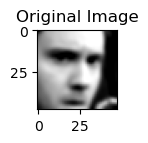

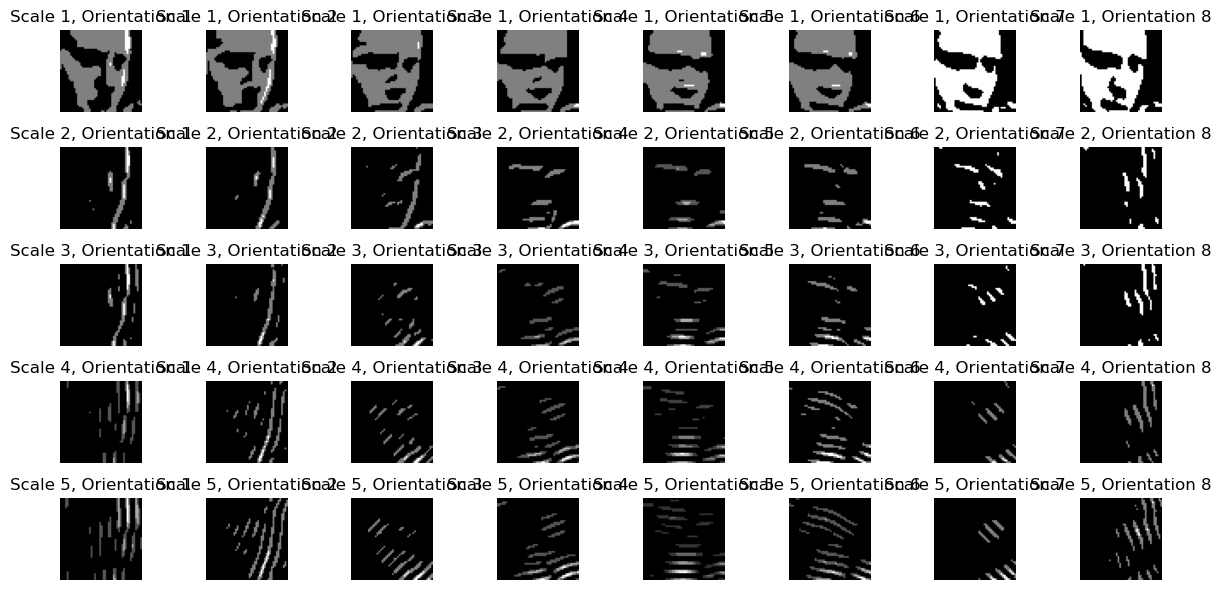

<Figure size 640x480 with 0 Axes>

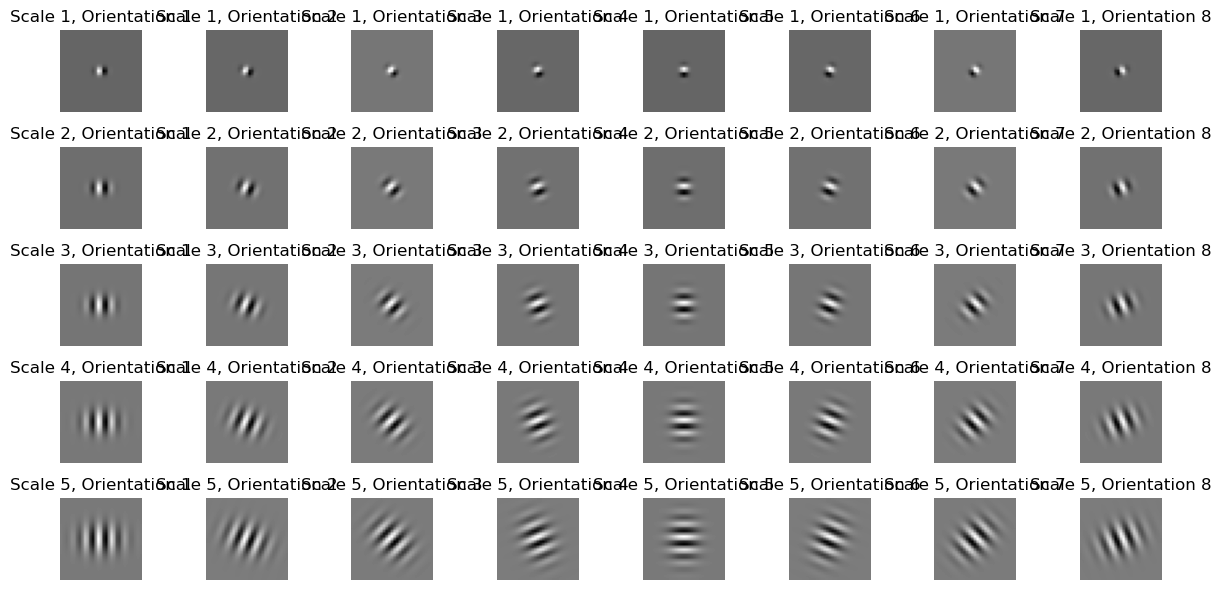

In [16]:
test_params = [31, 0.5, 6, 1.5, -1]

test_kerns = build_gabor_kernels(ksize=31, sigma=1.5, lambd=6, gamma=1.5, psi=-0.5, orientations=8, scales=5)

test_images = apply_gabor_filters(X[10].reshape(48, 48), test_kerns)


plt.figure(figsize=(12, 6))
plt.subplot(5, 8, 1)
plt.imshow(example_image, cmap='gray')
plt.title('Original Image')
plt.show()

visualize_kernels(filtered_images, orientations=8, scales=5)

plt.tight_layout()
plt.show()

# Visualize all the Gabor kernels
visualize_kernels(best_kernels, orientations=8, scales=5)

## 2c: Extraction locale des primitives

[Koutlas et Fotiadis (2008)](http://dx.doi.org/10.4018/9781605663142.ch016) ont proposé un ensemble de 20 points de référence. Selon les auteurs, ces points se situent autour des caractéristiques proéminentes du visage qui contiennent les informations les plus importantes concernant le mouvement musculaire responsable des expressions faciales.

Étant donné que vous ne connaissez pas la localisation de ces points de référence, une manière approximée d’extraire des informations locales des images de visage consiste à diviser l'image en $n$ petits zones de dimension égale  ($z_0, z_1,... ,z_n$) et d'extraire des primitives de chaque zone. Les primitives extraites de chaque zone sont ensuite concaténées en un seul vecteur de primitives.

![Exemples de FER](https://b2633864.smushcdn.com/2633864/wp-content/uploads/2021/04/face_reco_lbps_header.png?lossy=1&strip=1&webp=1)

###  <font color=blue> À faire: </font>
1. Utiliser une grille de dimension à votre choix (p. ex. $2$$\times$$2$, $4$$\times$$4$, $6$$\times$$6$, ...) de façon à créer de zones sur des images.
Remarque: La dimension de vos nouveaux ensembles de données pourrait maintenant être [samples][channels][nb_squares_per_img][width][height].
2. Répétez les pas de 2b, c.-à-d., éxtraire les primitives choisies de chaque cellule (zone) (ensembles d'apprentissage, validation et test). Un vecteur de primitives similaire à celui de la partie 2b sera produit pour chaque zone.
3. Concaténez séquentiellement les vecteurs générés pour chaque zone.

 - Chaque image de visage sera alors représentée par un vecteur de dimension $d$ $\times$ $nombre\_de\_zones$.<br><br>
4. Sauvegardez vos vecteurs de primitives sous la forme d'un fichier 'csv' (*fer2013-clean-lbp-zone4x4.csv* ou *fer2013-clean-pre-lbp-zone4x4.csv*). N'oubliez pas d'utiliser toujours la même structure du fichier original *fer2013.csv*. Vous devez nommer vos fichiers de primitive en référence à la primitive utilisée et la dimension de la grille choisie, p. ex., *fer2013-clean-lbp-zone4x4.csv* pour un zonage $4$$\times$$4$, *fer2013-clean-hog-zone8x8.csv* pour un zonage $8$$\times$$8$.

#### Code

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Get the dimensions of the image
height, width = example_image.shape

# Define the number of rows and columns for the grid
rows = 4
cols = 4

# Calculate the size of each zone
zone_height = height // rows
zone_width = width // cols


def fast_local_feature_extraction(image, rows=4, cols=4):
    height, width = image.shape
    zone_height = height // rows
    zone_width = width // cols

    features = []

    for i in range(rows):
        for j in range(cols):
            # Calculate the start and end indices for slicing
            start_row = i * zone_height
            end_row = (i + 1) * zone_height
            start_col = j * zone_width
            end_col = (j + 1) * zone_width
        
            # Slice the image to extract the current zone
            zone = image[start_row:end_row, start_col:end_col]
            
            # Calculate features for the zone using vectorized operations
            mean = np.mean(zone)
            variance = np.var(zone)
            energy_val = np.sum(zone**2)
            entropy_val = -np.sum(zone * np.log(zone + 1e-6))
            
            # Append features to the list
            features.extend([mean, variance, energy_val, entropy_val])
            
    return np.array(features)


def batch_local_feature_extraction(images, rows=4, cols=4):
    batch_size, height, width = images.shape
    zone_height = height // rows
    zone_width = width // cols

    features = []

    for image in images:
        for i in range(rows):
            for j in range(cols):
                # Calculate the start and end indices for slicing
                start_row = i * zone_height
                end_row = (i + 1) * zone_height
                start_col = j * zone_width
                end_col = (j + 1) * zone_width
            
                # Slice the image to extract the current zone
                zone = image[start_row:end_row, start_col:end_col]
                
                # Calculate features for the zone
                mean = np.mean(zone)
                variance = np.var(zone)
                energy_val = np.sum(zone**2)
                entropy_val = -np.sum(zone * np.log(zone + 1e-6))
                
                # Append features to the list
                features.extend([mean, variance, energy_val, entropy_val])
    
    return np.array(features).reshape(batch_size, -1)

# Feature extraction function
def local_feature_extraction(image, rows=4, cols=4):
    height, width = image.shape
    zone_height = height // rows
    zone_width = width // cols

    feature = [[[] for _ in range(cols)] for _ in range(rows)]
    
    for i in range(rows):
        for j in range(cols):
            # Calculate the start and end indices for slicing
            start_row = i * zone_height
            end_row = (i + 1) * zone_height
            start_col = j * zone_width
            end_col = (j + 1) * zone_width
        
            # Slice the image to extract the current zone
            zone = image[start_row:end_row, start_col:end_col]
            
            # Calculate features for the zone
            mean = np.mean(zone)
            variance = np.var(zone)
            energy_val = np.sum(zone**2)
            entropy_val = -np.sum(zone * np.log(zone + 1e-6))
            
            # Append features to the list
            feature[i][j].append(mean)
            feature[i][j].append(variance)
            feature[i][j].append(energy_val)
            feature[i][j].append(entropy_val)
            
            # Optional: Display the zone

    return feature


def local_area_feature_extraction(kernel_images: np.ndarray, rows: int = 4, cols: int = 4) -> np.ndarray:
# Process each filtered image and collect features
    info = []
    for img in kernel_images:
        feature = fast_local_feature_extraction(img)
        #feature = local_feature_extraction(img)
        info.append(feature)

    # Convert the list of features into a NumPy array with the desired structure
    info_array = np.array(info)

    # Reshape the array to have the desired dimensions: [num_images, rows, cols, extracted_features]
    #num_images = len(info)
    #rows, cols = len(info[0]), len(info[0][0])
    #extracted_features = len(info[0][0][0])  # Assuming all feature lists have the same length

    info_array = info_array.reshape((40, rows, cols, 4))
 
    return info_array

# Extract features for each local area
normalized_info_array = local_area_feature_extraction(filtered_images)

# Convert to a more readable format
formatted_info_array = np.around(normalized_info_array, decimals=3)

# To verify the structure and values
print("Shape of formatted_info_array:", formatted_info_array.shape)
print("Formatted info array:\n", formatted_info_array)

# Check that values are within the range [0, 1]
print("Min value in formatted_info_array:", np.min(formatted_info_array))
print("Max value in formatted_info_array:", np.max(formatted_info_array))


Shape of formatted_info_array: (40, 4, 4, 4)
Formatted info array:
 [[[[ 2.7800e-01  2.0100e-01  4.0000e+01 -0.0000e+00]
   [ 9.1700e-01  7.6000e-02  1.3200e+02 -0.0000e+00]
   [ 1.0000e+00  0.0000e+00  1.4400e+02 -0.0000e+00]
   [ 6.8100e-01  6.4800e-01  1.6000e+02 -4.2975e+01]]

  [[ 7.2900e-01  1.9700e-01  1.0500e+02 -0.0000e+00]
   [ 2.0100e-01  1.6100e-01  2.9000e+01 -0.0000e+00]
   [ 4.3800e-01  2.7400e-01  6.7000e+01 -2.7730e+00]
   [ 3.2600e-01  2.6200e-01  5.3000e+01 -4.1590e+00]]

  [[ 4.5100e-01  2.4800e-01  6.5000e+01 -0.0000e+00]
   [ 7.9200e-01  1.6500e-01  1.1400e+02 -0.0000e+00]
   [ 6.3900e-01  2.3100e-01  9.2000e+01 -0.0000e+00]
   [ 3.6100e-01  4.1100e-01  7.8000e+01 -1.8022e+01]]

  [[ 1.2500e-01  1.0900e-01  1.8000e+01 -0.0000e+00]
   [ 5.2800e-01  2.4900e-01  7.6000e+01 -0.0000e+00]
   [ 4.2400e-01  2.4400e-01  6.1000e+01 -0.0000e+00]
   [ 1.8800e-01  1.5200e-01  2.7000e+01 -0.0000e+00]]]


 [[[ 4.3100e-01  2.4500e-01  6.2000e+01 -0.0000e+00]
   [ 1.0000e+00  0.00

In [19]:

## Here we are going to tho the same thing for the xtest and xval

#First create the kernels for xtest and xval

#Todo FIX THIS





def apply_full_process(X: np.ndarray) -> np.ndarray:
    gabor_processed_kernels = []
    i = 0
    for img in X:
        i += 1
        if(i% 1000 == 0):
            print(f"Processed {i/X.shape[0] * 100:.2f}% of images")
        img = img.reshape(48, 48)
        filtered_images = apply_gabor_filters(img, best_kernels)
        
        normalized_info_array = local_area_feature_extraction(filtered_images)
        gabor_processed_kernels.append(normalized_info_array)
        
    # Extract features for each local area
    gabor_processed_kernel_array = np.array(gabor_processed_kernels)    
    
    return gabor_processed_kernel_array    

print(Xtrain_processed.shape ,Xtest_processed.shape, Xval_processed.shape)

Xtrain_primitives_local = apply_full_process(Xtrain_processed)
print("Done 1")
print(Xtrain_primitives_local.shape)


Xtest_primitives_local = apply_full_process(Xtest_processed)
print("Done 2")
print(Xtest_primitives_local.shape)

Xval_primitives_local = apply_full_process(Xval_processed)

#print(Xtest_primitives_local, Xval_primitives_local)


(28657, 1, 48, 48) (3580, 1, 48, 48) (3582, 1, 48, 48)
Processed 3.49% of images
Processed 6.98% of images
Processed 10.47% of images
Processed 13.96% of images
Processed 17.45% of images
Processed 20.94% of images
Processed 24.43% of images
Processed 27.92% of images
Processed 31.41% of images
Processed 34.90% of images
Processed 38.39% of images
Processed 41.87% of images
Processed 45.36% of images
Processed 48.85% of images
Processed 52.34% of images
Processed 55.83% of images
Processed 59.32% of images
Processed 62.81% of images
Processed 66.30% of images
Processed 69.79% of images
Processed 73.28% of images
Processed 76.77% of images
Processed 80.26% of images
Processed 83.75% of images
Processed 87.24% of images
Processed 90.73% of images
Processed 94.22% of images
Processed 97.71% of images
Done 1
(28657, 40, 4, 4, 4)
Processed 27.93% of images
Processed 55.87% of images
Processed 83.80% of images
Done 2
(3580, 40, 4, 4, 4)
Processed 27.92% of images
Processed 55.83% of images
P

# Partie 3: Normalisations des vecteurs de primitive
Avant d'entraîner un premier modèle d'apprentissage automatique avec les vecteurs de primitives (global et local) extrait dans la Partie 2, vous devez faire une normalisation des primitives.

La normalisation transforme les caractéristiques en échelles similaires (modifier la plage des valeurs) pour aider à améliorer les performances et la stabilité d'entraînement d'un modèle d’apprentissage machine. Notez que tous les ensembles de données n'ont pas nécessairement besoin d'être normalisés. Il n'est nécessaire que lorsque les plages d'attributs sont différentes.

Les algorithmes basés sur les mesures de distance telle que $k$-PPV et SVM sont les plus affectés par des différences dans les échelles. Les algorithmes d'apprentissage automatique qui utilisent l'algorithme descente de gradient dans l'entraînement tel que la régression linéaire et la régression logistique nécessitent une mise à l'échelle des données (même plage des valeurs) pour aider la descente de gradient à converger plus rapidement vers les minima. D'autre part, les algorithmes basés sur les arbres ne sont pas sensibles à l'échelle des caractéristiques. En effet, un arbre de décision ne divise qu'un nœud en fonction d'une seule primitive (élément du vecteur), et cette division n'est pas influencée par d'autres éléments (primitives) du vecteur.

###  <font color=blue> À faire: </font>
1. Vous pouvez retrouver des algorithmes de normalisation de la bibliothèque 'scikit-learn' [dans l'onglet preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)que vous avez par exemple discuté en cours et comprendre les différentes types de normalisation.
 - Voir aussi l'exemple [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py)<br><br>
2. Choisir un algorithme pour normaliser vos vecteurs de primitives.
3. Normaliser vos vecteurs d'apprentissage, validation et test.

 - Attention! Utilisez *fit()* pour les données d'apprentissage et après *transform()* sur les trois partitions de données (apprentissage, validation et test).<br><br>
4. Sauvegardez vos vecteurs de primitives sous la forme d'un fichier 'csv' (*fer2013-clean-lbp-zone4x4-norm.csv* ou *fer2013-clean-pre-lbp-zone4x4-norm.csv*).


#### Code

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Votre code ici


print(Xtrain_primitives_local.shape, Xtest_primitives_local.shape, Xval_primitives_local.shape)

# Assuming you have your feature matrix X and target variable y



# Split the data into training and testing sets
X_train_local = Xtrain_primitives_local.reshape(Xtrain_primitives_local.shape[0], -1)
X_test_local = Xtest_primitives_local.reshape(Xtest_primitives_local.shape[0], -1)
X_val_local = Xval_primitives_local.reshape(Xval_primitives_local.shape[0], -1)


X_train_local, X_test_local, X_val_local = processData(X_train_local, X_test_local, X_val_local, is4848=False)


print(X_train_local.shape, X_test_local.shape, X_val_local.shape)



# Split the data into training and testing sets
X_train_global = Xtrain_global_features.reshape(Xtrain_global_features.shape[0], -1)
X_test_global = Xtest_global_features.reshape(Xtest_global_features.shape[0], -1)
X_val_global = Xval_global_features.reshape(Xval_global_features.shape[0], -1)


X_train_global, X_test_global, X_val_global = processData(X_train_global, X_test_global, X_val_global, is4848=False)





y_train = ytrain
y_test = ytest
y_val = yval


(28657, 40, 4, 4, 4) (3580, 40, 4, 4, 4) (3582, 40, 4, 4, 4)
(28657, 2560) (3580, 2560) (3582, 2560)


# Partie 4: Entraînement des modèle d'apprentissage machine

Vous êtes maintenant prêtes à entraîner un premier modèle d'apprentissage automatique avec les vecteurs de primitives (global et local) extraites dans la Partie 2.

## 4a: Entraîner un arbre de décision avec les primitives globales

###  <font color=blue> À faire: </font>
1. Étudiez l'algorithme [arbre de décision](https://scikit-learn.org/stable/modules/tree.html#tree-classification) de la bibliothèque `scikit-learn` pour bien comprendre les différents paramètres qui peuvent affecter l'entraînement, la généralisation et la complexité d’un modèle du type arbre de décision.
2. Étudiez les principaux hyperparamètres de [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) qui peuvent aider à améliorer sa performance.
3. Choisir quelques hyperparamètres (au moins 2) et tourner un "grid search" sur l'ensemble de validation pour trouver les meilleures valeurs pour ces hyperparamètres.

- Astuce: Vous avez déjà un ensemble de validation! Alors, c'est préférable (beaucoup plus rapide!) d’utiliser la bibliothèque [hypopt](https://pypi.org/project/hypopt/) pour faire le réglage des hyperparamètres (grid seach)<br><br>

4. Une fois que vous avez trouvé le meilleur modèle, utiliser ces modèles pour faire la prédiction sur tous les exemples (apprentissage, validation, test) et rapporter les résultats (comme fait dans le TP1):<br>
4a. Rapport de classification produit avec *<font color=green>from sklearn.metrics import classification_report</font>*<br>
4b. taux de classification correct sur les trois (3) ensembles de données (sous la forme d'un tableau)<br>
4c. matrice de confusion produite avec *<font color=green> from sklearn.metrics import confusion_matrix</font>* pour les résultats sur l'ensemble de test (matrice 7 $\times$ 7 - étiquétte $\times$ prédictions)

5. Sauvegarder votre modèle dans un fichier *.pkl*. Regarder [model persistence](https://scikit-learn.org/stable/model_persistence.html)


In [63]:
from sklearn.tree import DecisionTreeClassifier
from hypopt import GridSearch

# Define your Decision Tree Classifier
clf = DecisionTreeClassifier()

# Define parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [ 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [  'sqrt', 'log2']
}

grid = GridSearch(model=clf, param_grid=param_grid)
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print('Test Score for Optimized Parameters:', grid.score(X_test, y_test))
print('Best Parameters:', grid.best_params)


python(55846) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(55847) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(55848) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(55849) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(55850) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(55851) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(55852) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(55853) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Test Score for Optimized Parameters: 0.3293296089385475


Test Accuracy global:  0.2988826815642458
Validation Accuracy global:  0.28084868788386375
Train Accuracy global train:  0.9986390759674774
Confusion Matrix (Test Set):
 [[140  10  58  96  77  33  76]
 [  8  21   4  12   4   3   3]
 [ 72   3 143 123  67  47  71]
 [123   7 109 287 145  57 150]
 [ 80   5  75 124 151  37 119]
 [ 40   2  39  69  37 188  40]
 [ 88   6  84 161 100  46 140]]
Confusion Matrix (Validation Set):
 [[ 96   6  55 111  72  41  85]
 [  4  18   7   7   5   5  10]
 [ 66   7 130  93  72  57  71]
 [121  10 121 283 136  80 143]
 [ 86  11  83 172 141  51 106]
 [ 35   2  47  58  37 197  38]
 [ 75  10  83 142 100  55 141]]
Confusion Matrix (Training Set):
 [[3979    0    0    0    1    1    0]
 [   0  434    0    0    0    1    0]
 [   4    1 4079    0    0    6    1]
 [   0    0    0 7207    0    0    0]
 [   7    0    7    0 4809    0    0]
 [   0    0    4    1    0 3159    0]
 [   2    0    2    0    1    0 4951]]


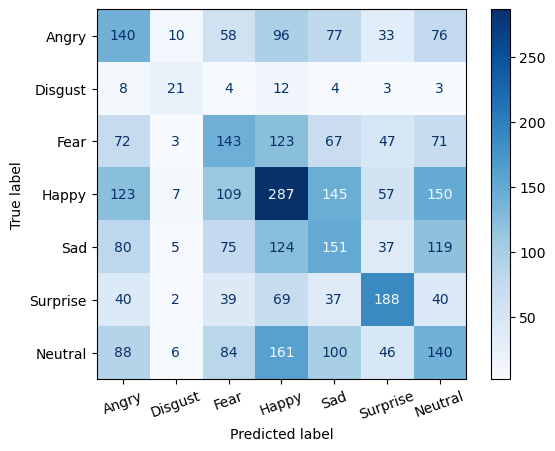

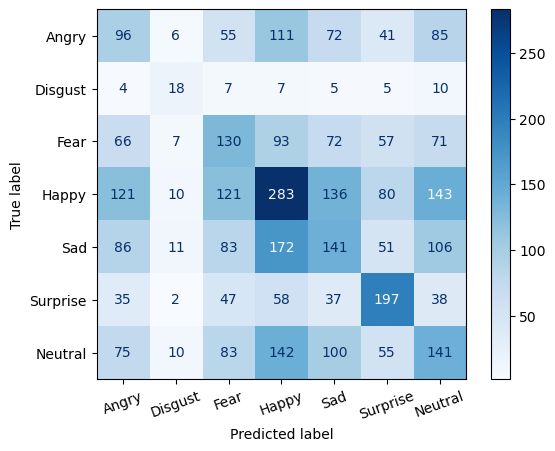

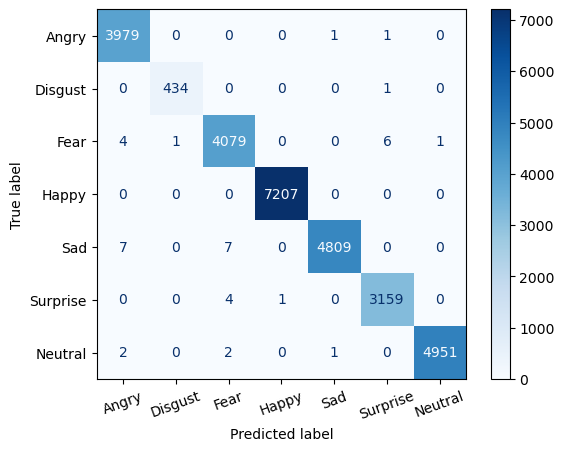

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the best parameters are already obtained from Grid Search or Randomized Search
# and assigned to final_model (DecisionTreeClassifier)

# Define class names (replace with your actual class names)
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']  # Example class names, replace with actual

# Train the final model with the best parameters
final_model = DecisionTreeClassifier()
final_model.fit(X_train_global, y_train)

# Evaluate the model on the test set
y_test_pred = final_model.predict(X_test_global.reshape(X_test_global.shape[0], -1))
y_train_pred = final_model.predict(X_train_global)
y_pred_val = final_model.predict(X_val_global)

print("Test Accuracy global: ", accuracy_score(y_test, y_test_pred))
print("Validation Accuracy global: ", accuracy_score(y_val, y_pred_val))
print("Train Accuracy global train: ", accuracy_score(y_train, y_train_pred))

# Confusion matrices
cm_test = confusion_matrix(y_test, y_test_pred)
cm_val = confusion_matrix(y_val, y_pred_val)
cm_train = confusion_matrix(y_train, y_train_pred )


# Function to plot confusion matrix
def plot_confusion_matrix(cm,title, class_names):
    cf_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    test = cf_disp.plot(cmap=plt.cm.Blues, values_format='.0f', xticks_rotation=20)
    plt.plot()
    plt.show()
# Plot the confusion matrices
plot_confusion_matrix(cm_test, "Confusion Matrix (Test Set)", class_names)
plot_confusion_matrix(cm_val, "Confusion Matrix (Validation Set)", class_names)
plot_confusion_matrix(cm_train, "Confusion Matrix (Training Set)", class_names)


## 4b: Entraîner un arbre de décision avec les primitives locales
###  <font color=blue> À faire: </font>
1. Refaire les étapes 3 à 5 de 4a)
2. Comparez les résultats avec ceux attendus avec les primitives globales et *template matching* (TP1)
3. Faire une brève analyse des résultats et présenter vos considérations et conclusions sur la performance de vos primitives + modèles.

#### Code

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np


# Define target variables
y_train = ytrain
y_test = ytest
y_val = yval

# Initialize the Decision Tree Classifier
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 31),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

aarameters =  {'splitter': 'best', 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 12, 'criterion': 'entropy'}


clf = DecisionTreeClassifier()

# Initialize the Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the Randomized Search to the data
random_search.fit(X_train_local, y_train)

# Evaluate the best model
best_model = random_search.best_estimator_
score = best_model.score(X_test_local, y_test)

# Print the best parameters and the best score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)
print("Test Score: ", score)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   4.4s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=  16.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=  16.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=  16.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=  16.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=  16.2s
[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=  16.2s
[CV] END criterion=entropy, max_depth=8, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=  16.2s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=  12.4s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=  19.8s
[CV] END criterion=gini, max_depth=28, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=  23.7s
[CV] END criterion=gini, max_depth=28, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=  26.9s
[CV] END criterion=gini, max_depth=28, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=  14.9s
[CV] END criterion=entropy, max_depth=29, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   2.6s
[CV] END criterion=gini, max_depth=28, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=  13.5s
[CV] END criterion=entropy, max_depth=29, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   1.7s
[CV] END criterion=entropy, max_depth=29, max_features=l

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   1.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   1.0s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   1.0s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   1.1s
[CV] END criterion=gini, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=3, splitter=best; total time=   1.1s
[CV] END criterion=gini, max_depth=29, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=  59.8s
[CV] END criterion=gini, max_depth=29, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best; total time= 1.1min
[CV] END criterion=gini, max_depth=29, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best; total time= 1.1min
[CV] END criterion=gini, max_depth=29, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best; total time= 1.1min
[CV] END criterion=gini, max_depth=29, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best; total time= 1.1min
[CV] END criterion=gini, max_depth=24, max_features=None, min_samples_l

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=28, max_features=log2, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   1.7s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   2.9s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   3.0s
[CV] END criterion=entropy, max_depth=30, max_features=None, min_samples_leaf=4, min_samples_split=3, splitter=random; total time=  11.3s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   3.2s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   1.9s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   2.8s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   1.9s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   1.6s
[CV] END criterion=entropy, max_depth=14, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   2.8s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   1.7s
[CV] END criterion=gini, max_depth=9, max_features=log2, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   1.6s
[CV] END criterion=entropy, max_depth=30, max_features=Non

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be rem

[CV] END criterion=gini, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   4.2s
[CV] END criterion=gini, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   4.3s
[CV] END criterion=gini, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   4.4s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   3.0s
[CV] END criterion=gini, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   5.2s
[CV] END criterion=gini, max_depth=28, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random; total time=   7.7s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   1.8s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   3.3s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   3.1s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   8.8s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=4, min_samples_split=4, splitter=best; total time=   3.5s
[CV] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   3.0s
[CV] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   4.1s
[CV] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   4.5s
[CV] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   1.9s
[CV] END criterion=gini, max_depth=24, max_features=sqrt, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   2.5s
[CV] END criterion=gini, max_depth=18, max_features=sqr

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   3.0s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   3.4s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   2.2s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=28, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   1.8s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   1.9s
[CV] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=best; total time=   2.3s
[CV] END criterion=entropy, max_depth=28, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   1.5s
[CV] END criterion=entropy, max_depth=28, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   1.5s
[CV] END criterion=entropy, max_depth=28, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   1.5s
[CV] END criterion=entropy, max_depth=28, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   1.4s
[CV] END criterion=gini, max_depth=7, max_features

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   5.1s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   6.1s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   6.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   2.1s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   2.9s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=best; total time=   2.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.9s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.8s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.7s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.8s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.4s
[CV] END criterion=gini, max_depth=14, max_features=auto, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.5s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.8s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   0.8s
[CV] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random; total time=   0.8s
[CV] END criterion=gini, max_depth=11, max

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=11, max_features=sqrt, min_samples_leaf=2, min_samples_split=9, splitter=random; total time=   1.0s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   1.5s
[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   0.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   1.0s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   1.3s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   1.3s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   1.2s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   1.1s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   1.4s
[CV] END criterion=entropy, max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, splitter=random; total time=   1.4s
[CV] END criterion=entropy, max_depth=16, max_features=None, min_samples_leaf=2, min_samples_split=7, splitter=best; total time= 1.0min
[CV] END criterion=entropy, max_depth=1

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.5s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.5s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.5s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.4s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   1.1s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   0.6s
[CV] END criterion=gini, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   1.3s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   1.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=  46.8s
[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=  46.6s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   1.7s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=15, max_features=None, min_samples_leaf=4, min_samples_split=9, splitter=best; total time=  46.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   2.4s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   1.1s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.8s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.8s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   2.6s
[CV] END criterion=entropy, max_depth=11, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   3.1s
[CV] END criterion=gini, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.5s
[CV] END criterion=gini, max_depth=7, max_features=sqrt,

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be rem

[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   2.1s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   2.2s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   2.3s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   2.4s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   1.8s
[CV] END criterion=entropy, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   2.1s
[CV] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   1.8s
[CV] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   1.8s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   1.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=19, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   1.6s
[CV] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.7s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.8s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.6s
[CV] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.6s
[CV] END criterion=gini, max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, splitter=best; total time=   1.6s
[CV] END criterion=entropy, max_depth=23, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best; total time= 1.1min
[CV] END criterion=entropy, max_depth=23, max_features=None, min_samples_leaf=1, min_samples_split=9, splitter=best; total time= 1.1min
[CV] END criterion=entropy, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   2.1s
[CV] END criterion=entropy, max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, splitter=best; total time=   1.8s
[CV] END criterion=entropy, max_depth=28, max_features=sq

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   1.0s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.8s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.8s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=26, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.8s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.7s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.6s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.6s
[CV] END criterion=gini, max_depth=29, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=  12.1s
[CV] END criterion=entropy, max_depth=16, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   0.8s
[CV] END criterion=entropy, max_depth=25, max_f

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=29, max_features=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=  11.4s
[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   1.0s
[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.9s
[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.9s
[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=2, min_samples_split=8, splitter=random; total time=   0.9s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.3s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.3s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.3s
[CV] END criterion=entropy, max_depth=14, max_features=log2, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.4s
[CV] END criterion=entropy, max_de

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.9s
[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   1.0s
[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.9s
[CV] END criterion=entropy, max_depth=24, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   0.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   2.1s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   1.7s
[CV] END criterion=entropy, max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   1.8s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   2.0s
[CV] END criterion=entropy, max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=best; total time=   2.1s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   7.2s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   6.2s
[CV] END criterion=entropy, max_depth=10, max_features=None, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   6.4s
[CV] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   1.4s
[CV] END criterion=gini, max_depth=14, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=best; total time=   1.4s
[CV] END criterion=gini, max_depth=14, max_featu

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.3s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.3s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.4s
[CV] END criterion=entropy, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   0.4s
[CV] END criterion=gini, max_depth=29, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.6s
[CV] END criterion=gini, max_depth=29, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.7s
[CV] END criterion=gini, max_depth=29, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.8s
[CV] END criterion=entropy, max_depth=17, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time= 1.1min
[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   1.1s
[CV] END criterion=entropy, max_depth=7, max_features=

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   1.4s
[CV] END criterion=entropy, max_depth=17, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time= 1.1min
[CV] END criterion=entropy, max_depth=17, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time= 1.2min


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=17, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time= 1.1min


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   3.5s
[CV] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   3.6s
[CV] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   4.0s
[CV] END criterion=entropy, max_depth=26, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   2.6s
[CV] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   4.9s
[CV] END criterion=entropy, max_depth=26, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   3.0s
[CV] END criterion=entropy, max_depth=26, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   3.3s
[CV] END criterion=entropy, max_depth=21, max_fe

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   3.8s
[CV] END criterion=entropy, max_depth=13, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=best; total time=   3.2s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   2.7s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   8.7s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   9.3s
[CV] END criterion=gini, max_depth=5, max_features=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   9.7s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   7.4s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   7.7s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   4.7s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   5.4s
[CV] END criterion=gini, max_depth=17, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   5.4s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   3.4s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   4.1s
[CV] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   5.4s
[CV] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   8.2s
[CV] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   9.8s
[CV] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=  10.0s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   5.4s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   5.4s
[CV] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   2.1s
[CV] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   2.3s
[CV] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   3.4s
[CV] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   3.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   2.8s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   3.0s
[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   3.0s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   4.3s
[CV] END criterion=gini, max_depth=9, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   7.0s
[CV] END criterion=gini, max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   6.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=3, splitter=random; total time=   9.0s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   7.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   7.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   6.3s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=17, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  16.0s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   8.8s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=8, splitter=random; total time=   9.1s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   3.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   2.3s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   3.7s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   4.6s
[CV] END criterion=entropy, max_depth=27, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=random; total time=   2.0s
[CV] END criterion=gini, max_depth=17, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  21.7s
[CV] END criterion=gini, max_depth=17, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  21.7s
[CV] END criterion=gini, max_depth=17, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  23.5s
[CV] END criterion=gini, max_depth=17, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=  23.2s
[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   3.2s
[CV] END criterion=entropy, max_depth=12, max_

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=12, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, splitter=random; total time=   3.1s
[CV] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   4.4s
[CV] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   4.5s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=21, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=  14.8s
[CV] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   3.6s
[CV] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   3.0s
[CV] END criterion=entropy, max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=   2.9s
[CV] END criterion=gini, max_depth=21, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=  14.2s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   2.1s
[CV] END criterion=entropy, max_depth=6, max_features=log2, min_samples_leaf=1, min_samples_split=6, splitter=random; total time=   2.0s
[CV] END criterion=entropy, max_depth=6, max_fea

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   2.0s
[CV] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   2.0s
[CV] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   2.2s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   2.4s
[CV] END criterion=gini, max_depth=21, max_features=None, min_samples_leaf=1, min_samples_split=3, splitter=random; total time=  21.2s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   1.8s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=1, max_features=log2, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   5.1s
[CV] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   2.7s
[CV] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   5.2s
[CV] END criterion=gini, max_depth=23, max_features=auto, min_samples_leaf=2, min_samples_split=6, splitter=random; total time=   5.3s
[CV] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   2.2s
[CV] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   4.3s
[CV] END criterion=entropy, max_depth=23, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   4.3s
[CV] END criterion=entropy, max_depth=23, max_f

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   2.9s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   3.0s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   3.0s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   7.8s
[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   3.4s
[CV] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   4.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   2.5s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   2.5s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   3.1s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be rem

[CV] END criterion=entropy, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   6.6s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   6.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   6.1s
[CV] END criterion=gini, max_depth=6, max_features=auto, min_samples_leaf=1, min_samples_split=6, splitter=best; total time=   6.2s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   3.0s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   3.1s
[CV] END criterion=entropy, max_depth=11, max_features=log2, min_samples_leaf=4, min_samples_split=8, splitter=random; total time=   3.3s
[CV] END criterion=entropy, max_depth=4, max_feature

/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   2.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   1.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.6s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.7s
[CV] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best; total time= 1.1min
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.2s
[CV] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=2, min_samples_split=4, splitter=best; total time= 1.1min
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   2.4s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.8s
[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=gini, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=9, splitter=best; total time=   1.7s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   3.2s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   3.2s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   3.1s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   2.7s
[CV] END criterion=entropy, max_depth=19, max_features=auto, min_samples_leaf=1, min_samples_split=4, splitter=best; total time=   2.9s
[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   1.1s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=  59.7s
[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   1.1s
[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   1.3s
[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   1.3s
[CV] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=  53.1s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be rem

[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   1.9s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=12, max_features=None, min_samples_leaf=4, min_samples_split=8, splitter=best; total time=  54.8s
[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   1.9s
[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   1.9s
[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   1.9s
[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   2.0s


/Users/laurentmarleau-gallant/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   2.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   2.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   2.3s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   2.5s
[CV] END criterion=entropy, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=7, splitter=random; total time=   2.7s
[CV] END criterion=gini, max_depth=26, max_features=auto, min_samples_leaf=1, min_samples_split=7, splitter=random; total time=   2.8s
[CV] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=7, splitter=random; total time=   3.0s
[CV] END criterion=entropy, max_depth=15, 

Test Accuracy local primitive:  0.35391061452513967
Validation Accuracy local primitive:  0.3478503629257398
Train Accuracy global local primitive:  0.9986390759674774
Confusion Matrix (Test Set):
 [[132   5  73 102  71  46  61]
 [  6  19   1   8  13   4   4]
 [ 80   6 149  91  80  46  74]
 [105  10  76 393 131  47 116]
 [ 91  11  85 112 155  34 103]
 [ 34   4  40  48  37 206  46]
 [ 81   6  74 126  95  30 213]]
Confusion Matrix (Validation Set):
 [[131  13  55  77  65  41  84]
 [  5  20   4   3  12   5   7]
 [ 70   5 137  75  71  57  81]
 [102  12  72 399 123  52 134]
 [ 92   6  76 135 190  42 109]
 [ 34   1  50  44  40 209  36]
 [ 87  12  68 126 108  45 160]]
Confusion Matrix (Training Set):
 [[3979    0    0    0    1    1    0]
 [   0  434    0    0    0    1    0]
 [   4    1 4079    0    0    6    1]
 [   0    0    0 7207    0    0    0]
 [   7    0    7    0 4809    0    0]
 [   0    0    4    1    0 3159    0]
 [   2    0    2    0    1    0 4951]]


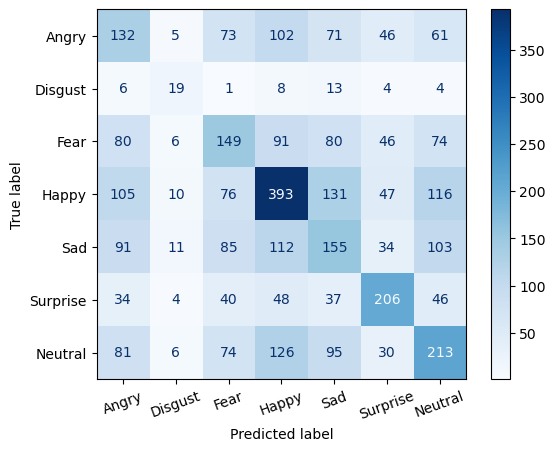

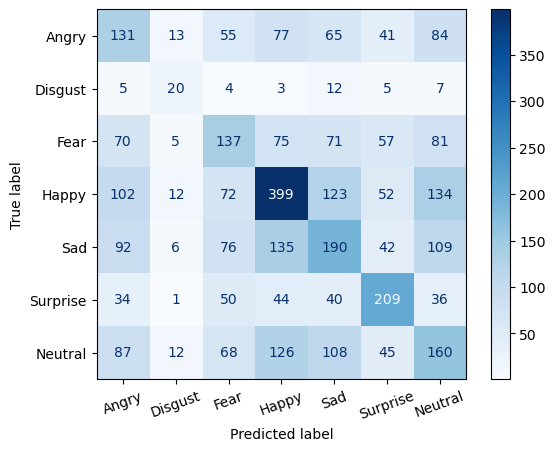

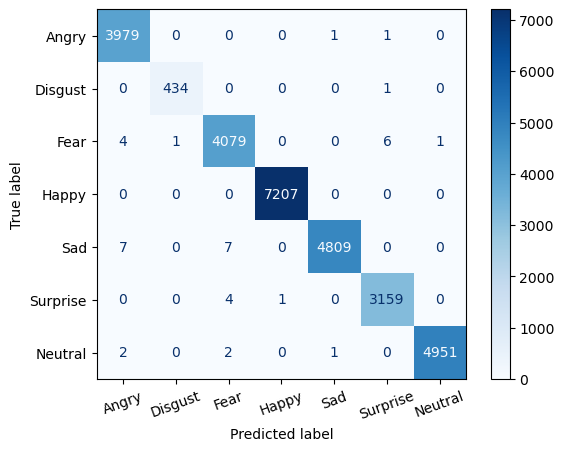

In [44]:

# Train the final model with the best parameters
final_model_local = DecisionTreeClassifier()
#final_model_local = best_model

final_model_local.fit(X_train_local, y_train)

# Evaluate the model on the test set (assuming X_test and y_test are defined)
y_test_pred = final_model_local.predict(X_test_local)
y_train_pred = final_model_local.predict(X_train_local)

y_pred_val = final_model_local.predict(X_val_local)

print("Test Accuracy local primitive: ", accuracy_score(y_test, y_test_pred))
print("Validation Accuracy local primitive: ", accuracy_score(y_val, y_pred_val))
print("Train Accuracy global local primitive: ", accuracy_score(y_train, y_train_pred))

# Confusion matrices
cm_test = confusion_matrix(y_test, y_test_pred)
cm_val = confusion_matrix(y_val, y_pred_val)
cm_train = confusion_matrix(y_train, y_train_pred )

# Plot the confusion matrices
plot_confusion_matrix(cm_test, "Confusion Matrix (Test Set)", class_names)
plot_confusion_matrix(cm_val, "Confusion Matrix (Validation Set)", class_names)
plot_confusion_matrix(cm_train, "Confusion Matrix (Training Set)", class_names)

#### Résultats et résponses

#### Vos répondes et résultats pour 4a) et 4b) ici:

##### Exemple:

Taux de classification (%)

| Ensemble | modèle TM   |  AD+LBP Global  | AD+LBP Local  |                                 
|----------|-------------|-----------------|---------------|
| App      | 99,67       |                 |               |                   
| Val      | 89,77       |                 |               |                             
| Test     | 77,99       |                 |               |        

# Fin